# <center> *Project - Cancer Prediction Model*


## Problem:
AIMD hospital is a medical facility which has just hired an intern in Machine Learning space due to the vast advancements of ML in the medical field. This facility has given the intern the data of 769 patients which have cancer and who have don’t have cancer. These patients have other conditions as well like past pregnancies, diabetes, insulin intake etc. The doctors are hoping these attributes will help the intern learn & build a model to predict whether a patient is likely to have cancer or not based on certain attributes.

Build a classification (KNN) model which will predict whether a patient is susceptible to cancer or not.

## Overall Approach
1. Retrieve information about the data for observation using.
2. Plotting various graphs (Scatter Plot, Pair Plot).
3. Plot Heatmap to observe correlation.
4. Build KNN classifier.
5. Model performance analysis.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For max displays
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Building Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import MinMaxScaler
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import classification_report
from sklearn                 import metrics
from scipy.spatial.distance  import cdist

#### Read the data using pandas from .csv file

In [2]:
df = pd.read_csv('cancer_Dataset.csv')

#### Check the shape of the dataset

In [3]:
df.shape

(768, 9)

#### Check first few rows

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Check dtypes, null values of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    int64  
 2   BloodPressure   768 non-null    int64  
 3   SkinThickness   768 non-null    int64  
 4   Insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## <center><span style='color:Purple'> Exploratatory Data Analysis </span></center>

### 1. Mean, Max & Min across each attribute

In [6]:
df.describe(percentiles = [.10, .20, .30, .40, .60, .70, .80, .90])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000,0.000000
20%,1.000000,95.000000,60.000000,0.000000,0.000000,25.900000,0.219400,23.000000,0.000000
30%,1.000000,102.000000,64.000000,8.200000,0.000000,28.200000,0.259000,25.000000,0.000000
40%,2.000000,109.000000,68.000000,18.000000,0.000000,30.100000,0.302800,27.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
60%,4.000000,125.000000,74.000000,27.000000,72.200000,33.700000,0.454200,33.000000,0.000000


In [7]:
print("Mean value of dataset attributes: ")
for col in df.columns:
    print("\r {0} = {1}".format(col, df[col].mean()))

print("*"*35)
print("Max value of dataset attributes: ")
for col in df.columns:
    print("\r {0} = {1}".format(col, df[col].max()))
    
print("*"*35)
print("Max value of dataset attributes: ")
for col in df.columns:
    print("\r {0} = {1}".format(col, df[col].min()))

Mean value of dataset attributes: 
 Pregnancies = 3.8450520833333335
 Glucose = 120.89453125
 BloodPressure = 69.10546875
 SkinThickness = 20.536458333333332
 Insulin = 79.79947916666667
 BMI = 31.992578124999977
 Cancer_Markers = 0.4718763020833327
 Age = 33.240885416666664
 Outcome = 0.3489583333333333
***********************************
Max value of dataset attributes: 
 Pregnancies = 17
 Glucose = 199
 BloodPressure = 122
 SkinThickness = 99
 Insulin = 846
 BMI = 67.1
 Cancer_Markers = 2.42
 Age = 81
 Outcome = 1
***********************************
Max value of dataset attributes: 
 Pregnancies = 0
 Glucose = 0
 BloodPressure = 0
 SkinThickness = 0
 Insulin = 0
 BMI = 0.0
 Cancer_Markers = 0.078
 Age = 21
 Outcome = 0


### 2. NA values
<span style='background : yellow' > **Observation:**   </span> There are no Null values present in the dataset.

In [8]:
df.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

#### Checking for any '0' value in columns and replacing invalid '0' with Mean
<span style='background : yellow' > **Observation:**   </span> SkinThickness, Insulin, Glucose, BMI cannot be '0' 

In [9]:
for i in df.columns:
    a = (df[i] == 0).sum()
    print('Number of zero values in', i, '=', a)

Number of zero values in Pregnancies = 111
Number of zero values in Glucose = 5
Number of zero values in BloodPressure = 35
Number of zero values in SkinThickness = 227
Number of zero values in Insulin = 374
Number of zero values in BMI = 11
Number of zero values in Cancer_Markers = 0
Number of zero values in Age = 0
Number of zero values in Outcome = 500


In [10]:
df[['SkinThickness']] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df[['Insulin']] = df['Insulin'].replace(0,df['Insulin'].mean())
df[['Glucose']] = df['Glucose'].replace(0,df['Glucose'].mean())
df[['BMI']] = df['BMI'].replace(0,df['BMI'].mean())

### 3. Scatter and Pair Plots

#### Making copy of the orginal dataset and dropping 'Outcome'

In [11]:
# Plots
df1 = df.copy()
df1.drop('Outcome',axis =1,inplace=True)

#### Scatter Plot

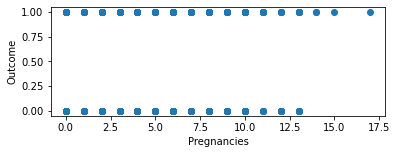

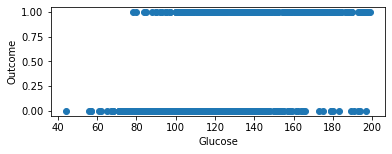

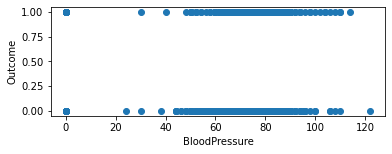

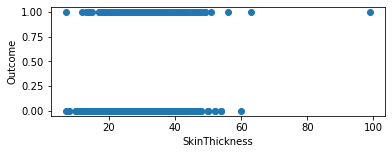

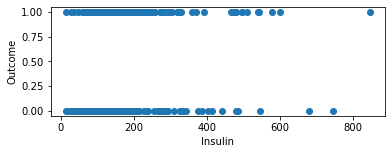

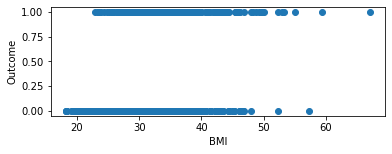

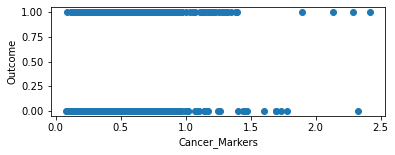

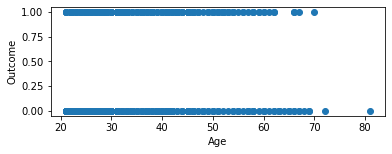

In [12]:
for i in df1.columns:
    fig, ax = plt.subplots(figsize=(6,2))
    ax.scatter(df[i], df['Outcome'])
    ax.set_xlabel(i, fontsize= 10)
    ax.set_ylabel('Outcome', fontsize= 10)

#### Pairplots

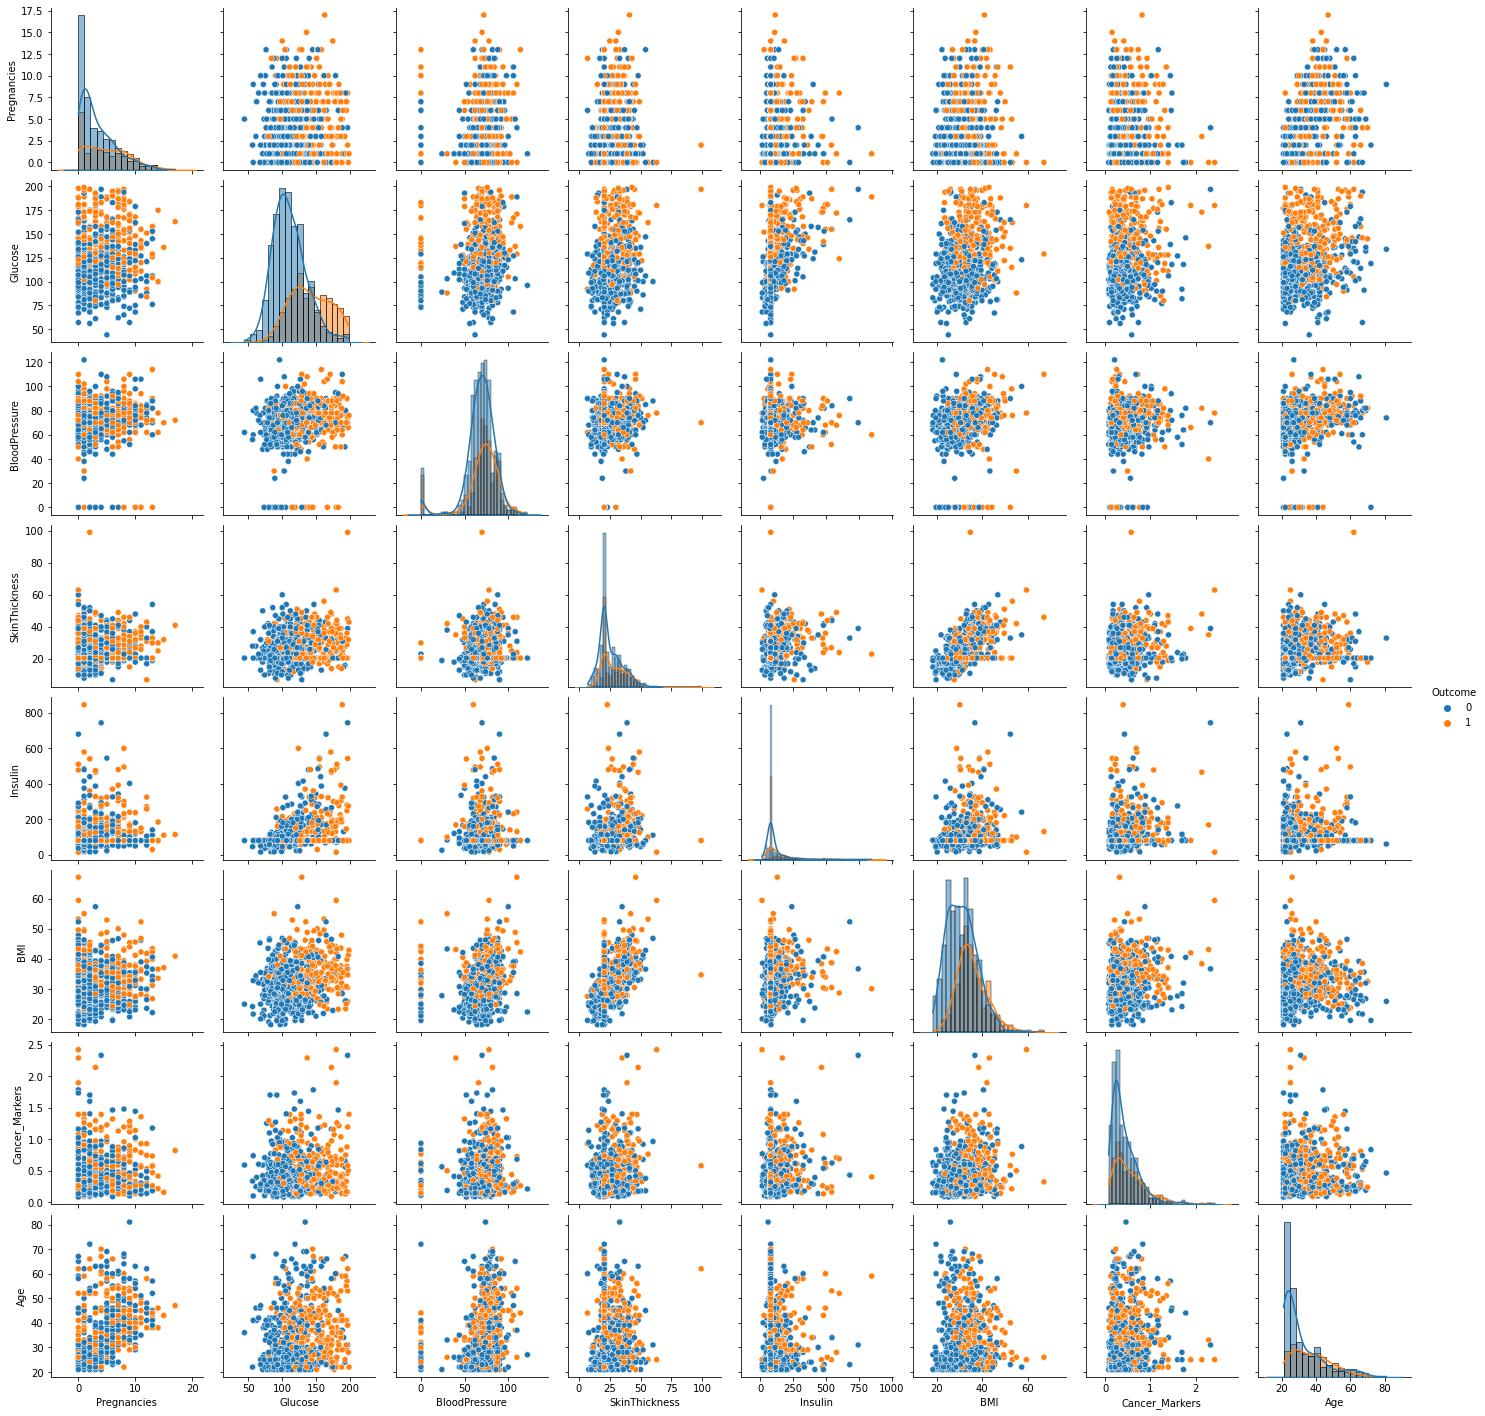

In [13]:
A = sns.pairplot(df, hue = 'Outcome')
A.map_diag(sns.histplot, kde = True, color = 'Red')
A.map_offdiag(sns.scatterplot, color = 'Black')

### 4. HEATMAP - to understand Correlation
<span style='background : yellow' > **Observation:**   </span> 
* Among all, BloodPressure has the least correlation with Outcome
* All the attributes can be taken ahead for model building

<AxesSubplot:>

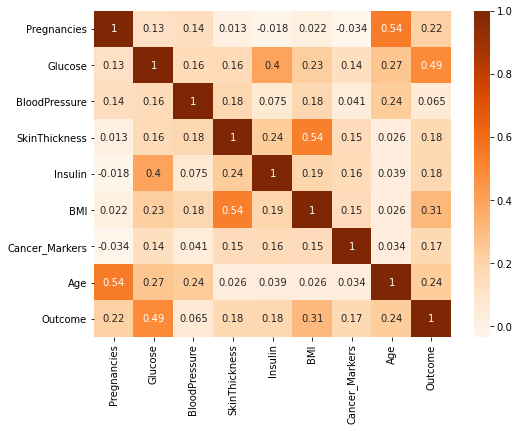

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap = 'Oranges', annot = True)

### 5. Scaling the data
<span style='background : yellow' > **Observation:**   </span> Tried both method Standard Scalar and Min Max Scaling. Between the two Min Max Scaling gave better results.

In [15]:
scaler = MinMaxScaler()
# transform data
df_Scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [16]:
scaler = StandardScaler()
df_Scaled_1 = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

## <center><span style='color:Purple'> Building KNN Classifier </span></center>

### 1. Building the Model
Test-Train Split and Stratified Sampling

In [17]:
# Test Train split
X = df_Scaled.drop('Outcome', axis = 1)
y = df[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=42,
                                                    stratify = y)

print("Shape of Training set {0}".format(X_train.shape))
print("Shape of Test set {0}".format(X_test.shape))

Shape of Training set (537, 8)
Shape of Test set (231, 8)


In [18]:
neighbors = np.arange(1, 25)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
distortions = []  

# Loop over K values
for i, k in enumerate(neighbors):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
#     distortions.append(sum(np.min(cdist(X, knn.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print('Accuracy ', i, ':', test_accuracy[i])

Accuracy  0 : 0.7229437229437229
Accuracy  1 : 0.7142857142857143
Accuracy  2 : 0.7056277056277056
Accuracy  3 : 0.7186147186147186
Accuracy  4 : 0.7402597402597403
Accuracy  5 : 0.7186147186147186
Accuracy  6 : 0.7575757575757576
Accuracy  7 : 0.7402597402597403
Accuracy  8 : 0.7575757575757576
Accuracy  9 : 0.7532467532467533
Accuracy  10 : 0.7445887445887446
Accuracy  11 : 0.7316017316017316
Accuracy  12 : 0.7186147186147186
Accuracy  13 : 0.7359307359307359
Accuracy  14 : 0.7402597402597403
Accuracy  15 : 0.7272727272727273
Accuracy  16 : 0.7316017316017316
Accuracy  17 : 0.7316017316017316
Accuracy  18 : 0.7272727272727273
Accuracy  19 : 0.7316017316017316
Accuracy  20 : 0.7359307359307359
Accuracy  21 : 0.7489177489177489
Accuracy  22 : 0.7316017316017316
Accuracy  23 : 0.7359307359307359


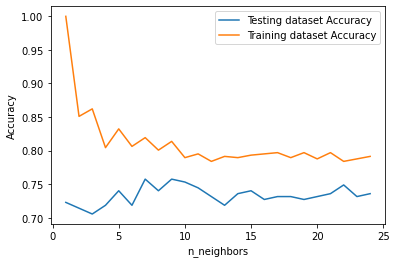

In [19]:
# Plotting the Accuracy
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [20]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7359307359307359


### 2. Plotting Elbow Curve

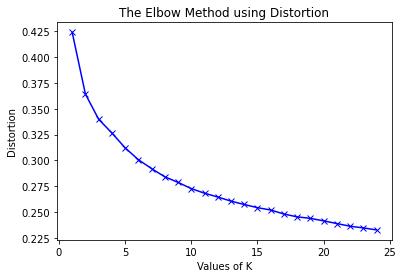

In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 25)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### 3. Finding Best value of K - GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn= GridSearchCV(knn,param_grid,cv = 5)
knn.fit(X,y)

print("Best Score:" + str(knn.best_score_))
print("Best Parameters: " + str(knn.best_params_))

Best Score:0.7747899159663865
Best Parameters: {'n_neighbors': 19}


In [23]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 19)

#Fit the model
knn.fit(X_train, y_train)

# Get Accuracy
knn.score(X_test, y_test)

0.7272727272727273

## <center><span style='color:Purple'> Model Performance Analysis </span></center>
### 1. Confusion Matrix

In [24]:
y_pred = knn.predict(X_test)
# from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[130  20]
 [ 43  38]]


In [25]:
print('True Positives:', cnf_matrix[0,0])
print('False Negatives:', cnf_matrix[0,1])
print('False Positives:', cnf_matrix[1,0])
print('True Negatives:', cnf_matrix[1,1])

True Positives: 130
False Negatives: 20
False Positives: 43
True Negatives: 38


### 2. Finding F1 Score of the Model

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       150
           1       0.66      0.47      0.55        81

    accuracy                           0.73       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.72      0.73      0.71       231



## <span style='color:Purple'> Conclusion </span>
### KNN classifier
* K value - 7
* Accuracy: 0.73

### GridSearchCV
* Best Score:0.77
* Best Parameters: {'n_neighbors': 19}

### Confusion Matrix
* True Positives: 130
* False Negatives: 20
* False Positives: 43
* True Negatives: 38

### F1 Score
* 0 - 0.80
* 1 - 0.55